## Association Rules Movies dataset

In [7]:
#install.packages("arules")
#install.packages("arulesViz")

In [8]:
library(arules)
library(arulesViz)

Warning message:
"package 'arulesViz' was built under R version 3.6.3"
Loading required package: grid

Registered S3 method overwritten by 'seriation':
  method         from 
  reorder.hclust gclus



In [9]:
data = read.csv('my_movies.csv')

In [10]:
data

V1,V2,V3,V4,V5,Sixth.Sense,Gladiator,LOTR1,Harry.Potter1,Patriot,LOTR2,Harry.Potter2,LOTR,Braveheart,Green.Mile
<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
Gladiator,Patriot,Braveheart,,,0,1,0,0,1,0,0,0,1,0
LOTR1,LOTR2,,,,0,0,1,0,0,1,0,0,0,0
Gladiator,Patriot,Sixth Sense,,,1,1,0,0,1,0,0,0,0,0
Gladiator,Patriot,Sixth Sense,,,1,1,0,0,1,0,0,0,0,0
Gladiator,Patriot,Sixth Sense,,,1,1,0,0,1,0,0,0,0,0
Harry Potter1,Harry Potter2,,,,0,0,0,1,0,0,1,0,0,0
Gladiator,Patriot,,,,0,1,0,0,1,0,0,0,0,0
Gladiator,Patriot,Sixth Sense,,,1,1,0,0,1,0,0,0,0,0


In [11]:
class(data)

[1] "data.frame"

In [12]:
colnames(data)

[1] "V1"            "V2"            "V3"            "V4"           
 [5] "V5"            "Sixth.Sense"   "Gladiator"     "LOTR1"        
 [9] "Harry.Potter1" "Patriot"       "LOTR2"         "Harry.Potter2"
[13] "LOTR"          "Braveheart"    "Green.Mile"

In [13]:
data$Sixth.Sense <- factor(data$Sixth.Sense,levels = c("1","0"),labels = c("Sixth.Sense",""))
data$Gladiator <- factor(data$Gladiator,levels = c("1","0"),labels = c("Gladiator",""))
data$LOTR1 <- factor(data$LOTR1,levels = c("1","0"),labels = c("LOTR1",""))
data$Harry.Potter1 <- factor(data$Harry.Potter1,levels = c("1","0"),labels = c("Harry.Potter1",""))
data$Patriot <- factor(data$Patriot,levels = c("1","0"),labels = c("Patriot",""))
data$LOTR2 <- factor(data$LOTR2,levels = c("1","0"),labels = c("LOTR2",""))
data$Harry.Potter2 <- factor(data$Harry.Potter2,levels = c("1","0"),labels = c("Harry.Potter2",""))
data$LOTR <- factor(data$LOTR,levels = c("1","0"),labels = c("LOTR",""))
data$Braveheart <- factor(data$Braveheart,levels = c("1","0"),labels = c("Braveheart",""))
data$Green.Mile <- factor(data$Green.Mile,levels = c("1","0"),labels = c("Green.Mile",""))


In [23]:
data

V1,V2,V3,V4,V5,Sixth.Sense,Gladiator,LOTR1,Harry.Potter1,Patriot,LOTR2,Harry.Potter2,LOTR,Braveheart,Green.Mile
<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,Sixth.Sense,,LOTR1,Harry.Potter1,,LOTR2,,,,Green.Mile
Gladiator,Patriot,Braveheart,,,,Gladiator,,,Patriot,,,,Braveheart,
LOTR1,LOTR2,,,,,,LOTR1,,,LOTR2,,,,
Gladiator,Patriot,Sixth Sense,,,Sixth.Sense,Gladiator,,,Patriot,,,,,
Gladiator,Patriot,Sixth Sense,,,Sixth.Sense,Gladiator,,,Patriot,,,,,
Gladiator,Patriot,Sixth Sense,,,Sixth.Sense,Gladiator,,,Patriot,,,,,
Harry Potter1,Harry Potter2,,,,,,,Harry.Potter1,,,Harry.Potter2,,,
Gladiator,Patriot,,,,,Gladiator,,,Patriot,,,,,
Gladiator,Patriot,Sixth Sense,,,Sixth.Sense,Gladiator,,,Patriot,,,,,


In [21]:
data

V1,V2,V3,V4,V5,Sixth.Sense,Gladiator,LOTR1,Harry.Potter1,Patriot,LOTR2,Harry.Potter2,LOTR,Braveheart,Green.Mile
<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,Sixth.Sense,,LOTR1,Harry.Potter1,,LOTR2,,,,Green.Mile
Gladiator,Patriot,Braveheart,,,,Gladiator,,,Patriot,,,,Braveheart,
LOTR1,LOTR2,,,,,,LOTR1,,,LOTR2,,,,
Gladiator,Patriot,Sixth Sense,,,Sixth.Sense,Gladiator,,,Patriot,,,,,
Gladiator,Patriot,Sixth Sense,,,Sixth.Sense,Gladiator,,,Patriot,,,,,
Gladiator,Patriot,Sixth Sense,,,Sixth.Sense,Gladiator,,,Patriot,,,,,
Harry Potter1,Harry Potter2,,,,,,,Harry.Potter1,,,Harry.Potter2,,,
Gladiator,Patriot,,,,,Gladiator,,,Patriot,,,,,
Gladiator,Patriot,Sixth Sense,,,Sixth.Sense,Gladiator,,,Patriot,,,,,


In [14]:
data1 <- as(data,"transactions")


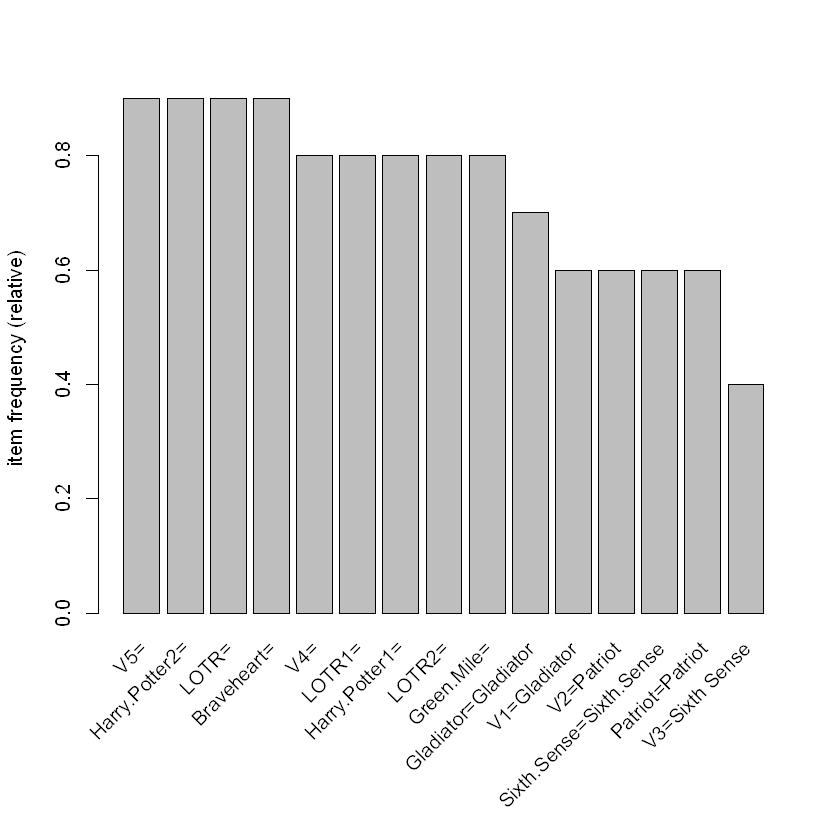

In [15]:
itemFrequencyPlot(data1,topN=15)

In [16]:
rules <- apriori(data1, parameter = list(supp = 0.005, confidence = 0.50, minlen = 2, maxlen = 3))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.5    0.1    1 none FALSE            TRUE       5   0.005      2
 maxlen target  ext
      3  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 0 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[38 item(s), 10 transaction(s)] done [0.00s].
sorting and recoding items ... [38 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3

Warning message in apriori(data1, parameter = list(supp = 0.005, confidence = 0.5, :
"Mining stopped (maxlen reached). Only patterns up to a length of 3 returned!"


 done [0.01s].
writing ... [6338 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


In [17]:
inspect(head(sort(rules), n = 10))

     lhs                 rhs              support confidence coverage lift    
[1]  {LOTR1=}         => {LOTR2=}         0.8     1.0000000  0.8      1.250000
[2]  {LOTR2=}         => {LOTR1=}         0.8     1.0000000  0.8      1.250000
[3]  {LOTR1=}         => {V5=}            0.8     1.0000000  0.8      1.111111
[4]  {V5=}            => {LOTR1=}         0.8     0.8888889  0.9      1.111111
[5]  {Harry.Potter1=} => {Harry.Potter2=} 0.8     1.0000000  0.8      1.111111
[6]  {Harry.Potter2=} => {Harry.Potter1=} 0.8     0.8888889  0.9      1.111111
[7]  {Harry.Potter1=} => {V5=}            0.8     1.0000000  0.8      1.111111
[8]  {V5=}            => {Harry.Potter1=} 0.8     0.8888889  0.9      1.111111
[9]  {LOTR2=}         => {V5=}            0.8     1.0000000  0.8      1.111111
[10] {V5=}            => {LOTR2=}         0.8     0.8888889  0.9      1.111111
     count
[1]  8    
[2]  8    
[3]  8    
[4]  8    
[5]  8    
[6]  8    
[7]  8    
[8]  8    
[9]  8    
[10] 8    


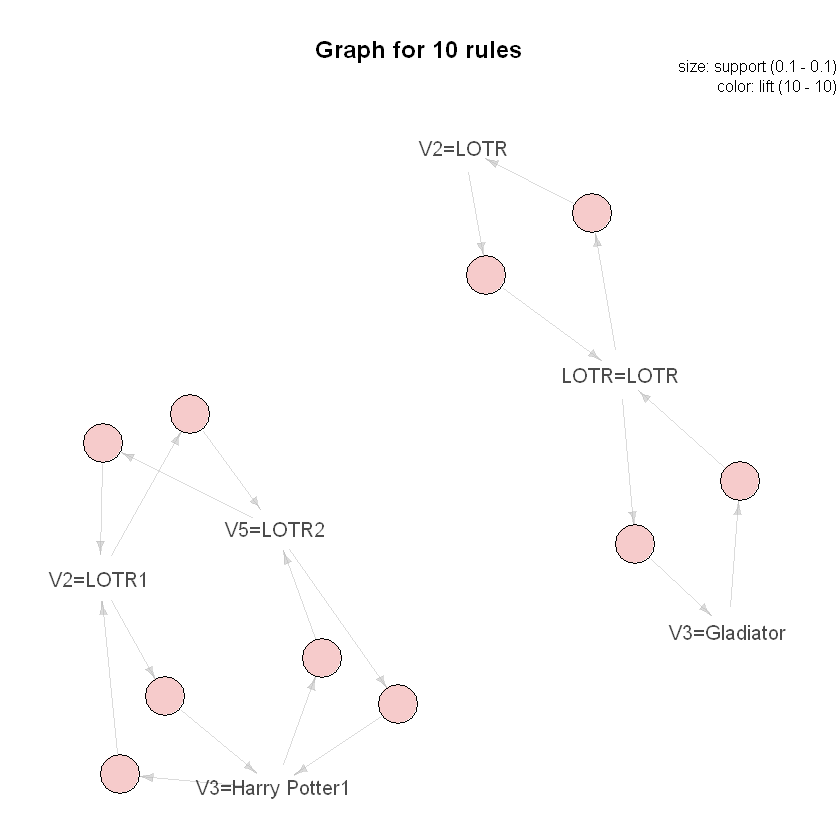

In [18]:
plot(head(sort(rules, by = "lift"), n = 10), method = "graph", control = list(cex = 1.0)) #cex = font size